In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from numpy.random import uniform
from math import isnan
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
country = pd.read_csv("country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

In [3]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country.shape

(167, 10)

In [5]:
country.isnull().sum(axis=0)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
country[country.isnull().sum(axis=1) > 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [7]:
pca = PCA(svd_solver='randomized', random_state=42)

In [8]:
X = country.drop('country', axis=1)

In [9]:
num_cols = np.array(X.select_dtypes(exclude=[object]).columns)

In [10]:
scaler = MinMaxScaler()

In [11]:
X[num_cols] = scaler.fit_transform(X[num_cols])

In [12]:
X.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.205112,0.311106,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,0.196343,0.137135,0.170717,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.118520,0.193288,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,0.081305,0.174550,0.280298,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,0.289679,0.256345,0.422001,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [14]:
pca.components_

array([[-0.47646333,  0.17033279,  0.13388598,  0.08161987,  0.30698142,
        -0.08800904,  0.42053483, -0.57108745,  0.33824337],
       [ 0.28173309,  0.46664393,  0.04450977,  0.39425729,  0.40440481,
        -0.00160198, -0.13751974,  0.36924598,  0.47607761],
       [ 0.1000117 , -0.390524  ,  0.78191122, -0.30277481,  0.06836671,
        -0.05702928,  0.00785737,  0.17483647,  0.30963696],
       [ 0.02908132, -0.18848786, -0.51298346, -0.6066558 ,  0.3728225 ,
         0.21262116,  0.14802117,  0.17306242,  0.31044817],
       [ 0.42095743, -0.10579788, -0.08330309, -0.10081385,  0.15996971,
        -0.2195551 , -0.5564373 , -0.62684939,  0.13469013],
       [ 0.08309594,  0.15131228,  0.2081468 , -0.01221525,  0.02247672,
         0.92453091, -0.10955292, -0.23223954, -0.07433502],
       [-0.68892064, -0.06411594,  0.0203469 , -0.01074206,  0.24033746,
         0.02335202, -0.6560359 ,  0.17206635, -0.04950529],
       [-0.05031919, -0.64019218, -0.22728423,  0.54440667, -0

In [15]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2
0,child_mort,-0.476463,0.281733
1,exports,0.170333,0.466644
2,health,0.133886,0.044510
3,imports,0.081620,0.394257
4,income,0.306981,0.404405


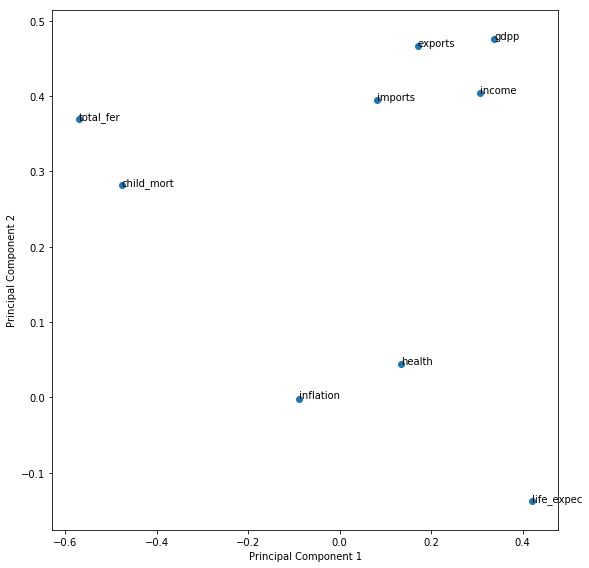

In [16]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [17]:
pca.explained_variance_ratio_

array([0.55001227, 0.13384784, 0.12301053, 0.09749047, 0.03777964,
       0.03013659, 0.01190434, 0.00887791, 0.00694042])

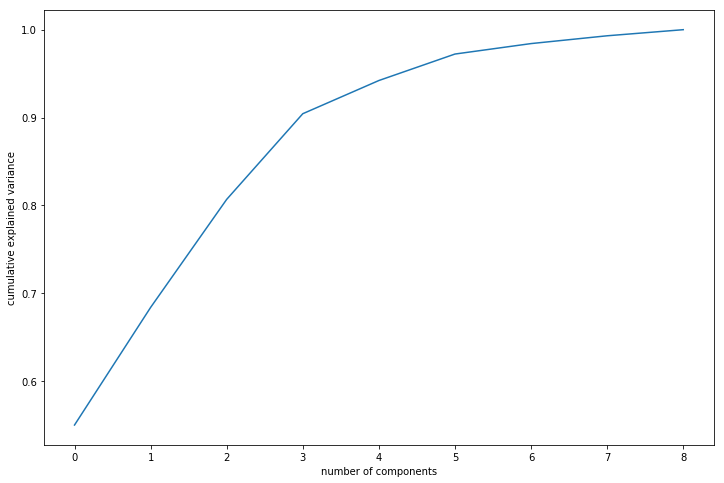

In [18]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [19]:
# Make an instance of the Model
pca_final = PCA(.95)

In [20]:
pca_final = IncrementalPCA(n_components=5)

In [21]:
df_train_pca = pca_final.fit_transform(X)
df_train_pca.shape

(167, 5)

In [22]:
corrmat = np.corrcoef(df_train_pca.transpose())

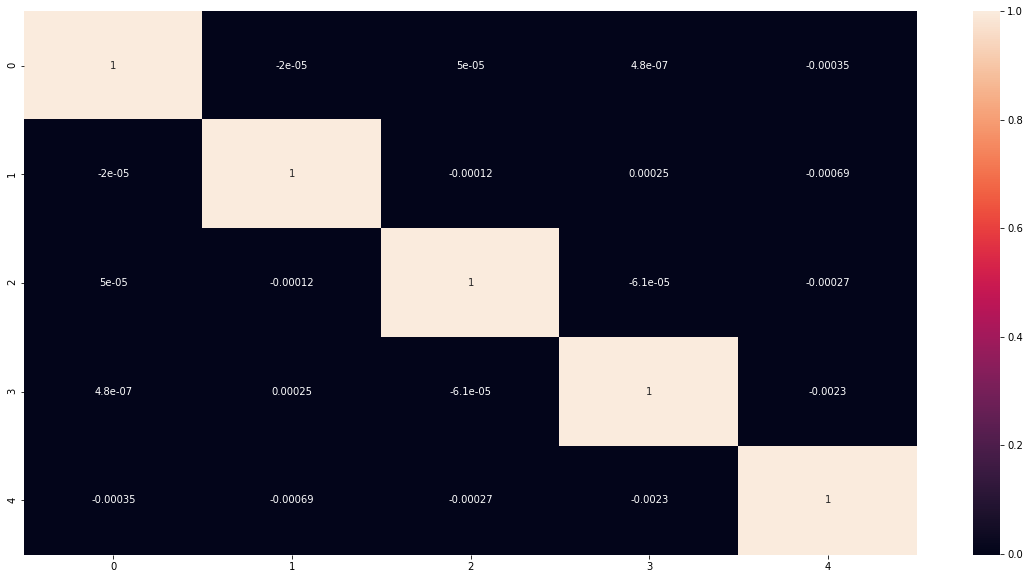

In [23]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [24]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0002547101383654497 , min corr:  -0.0023208312798684775


In [25]:
pca_df = pd.DataFrame(df_train_pca, columns=['PC1','PC2','PC3','PC4','PC5'])

In [26]:
final_pca = pd.merge(pca_df[(np.abs(stats.zscore(pca_df)) < 2).all(axis=1)]
                     , pd.DataFrame(country['country']), left_index=True, right_index=True)

In [27]:
final_pca.shape

(140, 6)

In [28]:
final_pca.head()

,PC1,PC2,PC3,PC4,PC5,country
0,0.599065,0.095506,0.157437,0.024382,0.042560,Afghanistan
1,-0.158455,-0.212345,-0.063709,0.061067,-0.017134,Albania
2,-0.003661,-0.135842,-0.133938,-0.133376,0.092225,Algeria
3,0.650272,0.276016,-0.143024,-0.155593,0.083921,Angola
4,-0.200684,-0.065162,-0.100418,0.037680,0.030574,Antigua and Barbuda


In [29]:
train_df = pca_df[(np.abs(stats.zscore(pca_df)) < 2).all(axis=1)]

In [30]:
 def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [55]:
hopkins(train_df)

0.7516516759233854

In [32]:
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(train_df)
    sse_.append([k, silhouette_score(train_df, kmeans.labels_)])

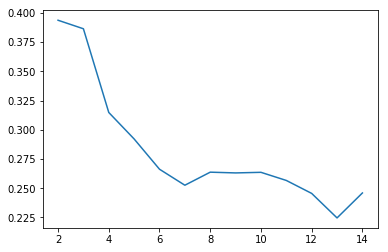

In [33]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

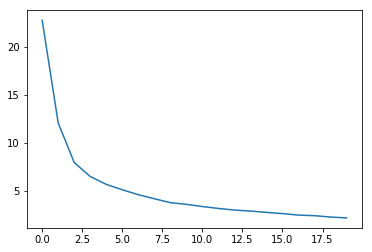

In [34]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(train_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [35]:
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(train_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
country.index = pd.RangeIndex(len(country.index))

In [37]:
km = pd.merge(country, pd.DataFrame(model_clus5.labels_), left_index=True, right_index=True)

In [38]:
km.columns = ['country', 'child_mort', 'exports', 'health', 'imports',
              'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

In [39]:
km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [40]:
km_clusters_child_mort = 	pd.DataFrame(km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(km.groupby(["ClusterID"]).gdpp.mean())

In [41]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,
               km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec,
               km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", 'child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean',
              'income_mean', 'inflation_mean', 'life_expec_mean', 'total_fer_mean', 'gdpp_mean']
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,38.003030,37.373000,6.211515,43.177755,13904.787879,8.198818,70.548485,2.795758,9368.303030
1,1,47.631034,36.762414,6.793448,44.306897,13523.586207,6.443207,69.441379,3.364828,9412.310345
2,2,41.938095,41.057143,7.329524,48.985714,17642.857143,5.249667,69.304762,2.764286,17487.571429
3,3,29.948571,45.005143,7.368000,49.228571,23763.971429,9.354286,72.314286,2.603714,16106.771429
4,4,41.313636,51.945455,6.329091,57.131818,18443.272727,5.450500,70.050000,3.171818,14239.727273


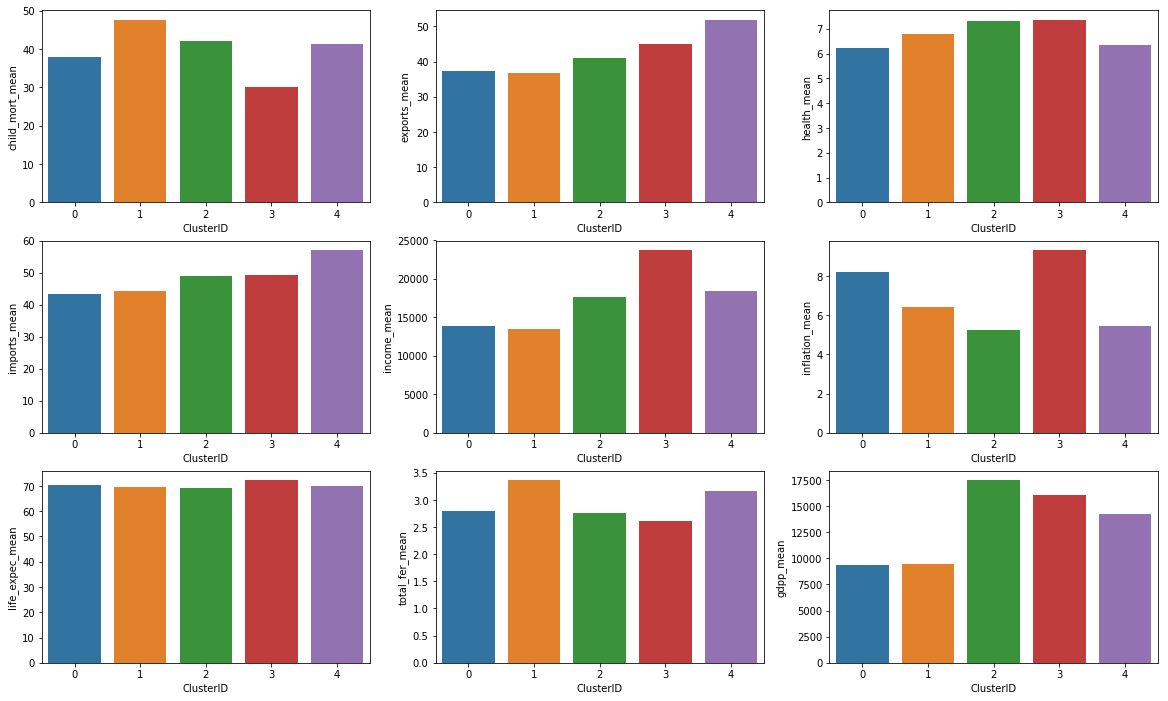

In [42]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=df.exports_mean)
plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=df.health_mean)
plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=df.imports_mean)
plt.subplot(3,3,5)
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.subplot(3,3,6)
sns.barplot(x=df.ClusterID, y=df.inflation_mean)
plt.subplot(3,3,7)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
plt.subplot(3,3,8)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
plt.subplot(3,3,9)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
plt.show()

In [43]:
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(train_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
country.index = pd.RangeIndex(len(country.index))
km = pd.merge(country, pd.DataFrame(model_clus4.labels_), left_index=True, right_index=True)
km.columns = ['country', 'child_mort', 'exports', 'health', 'imports',
              'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

km_clusters_child_mort = 	pd.DataFrame(km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(km.groupby(["ClusterID"]).gdpp.mean())

In [45]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,
               km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec,
               km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", 'child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean',
              'income_mean', 'inflation_mean', 'life_expec_mean', 'total_fer_mean', 'gdpp_mean']
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,46.948485,40.900303,6.756061,48.121212,15761.757576,6.076455,69.721212,3.405455,12483.181818
1,1,39.378000,40.916180,6.256800,46.439318,14578.920000,6.752040,70.320000,2.892000,9615.800000
2,2,29.841667,45.052222,7.314444,49.436111,23318.027778,10.183333,72.144444,2.604722,15732.972222
3,3,41.938095,41.057143,7.329524,48.985714,17642.857143,5.249667,69.304762,2.764286,17487.571429


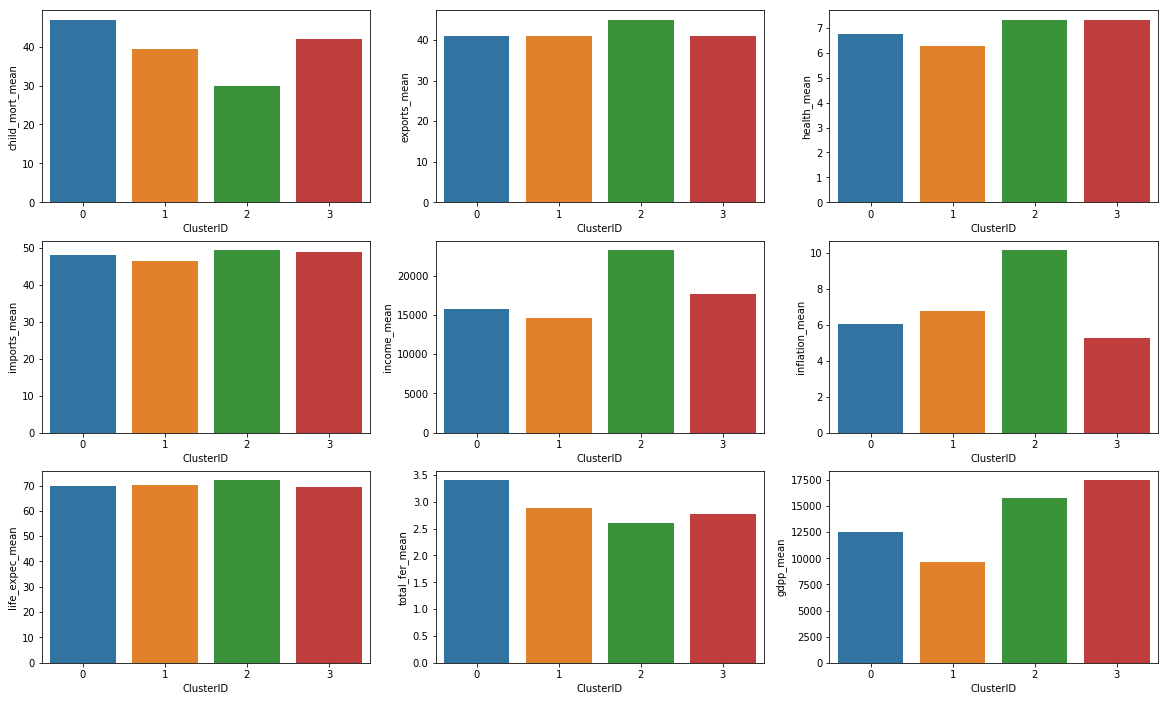

In [46]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=df.exports_mean)
plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=df.health_mean)
plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=df.imports_mean)
plt.subplot(3,3,5)
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.subplot(3,3,6)
sns.barplot(x=df.ClusterID, y=df.inflation_mean)
plt.subplot(3,3,7)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
plt.subplot(3,3,8)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
plt.subplot(3,3,9)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
plt.show()

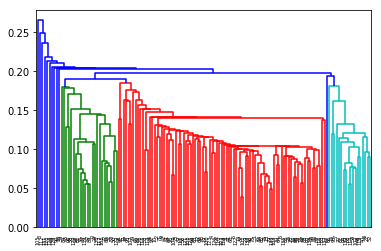

In [47]:
mergings = linkage(train_df, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

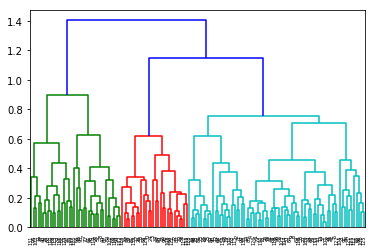

In [48]:
mergings = linkage(train_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [49]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [50]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
country_hc = pd.merge(country, pd.DataFrame(clusterCut), left_index=True, right_index=True)
country_hc.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
                      'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

In [51]:
country_hc_child_mort = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).child_mort.mean())
country_hc_exports = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).exports.mean())
country_hc_health = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).health.mean())
country_hc_imports = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).imports.mean())
country_hc_income = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).income.mean())
country_hc_inflation = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).inflation.mean())
country_hc_life_expec = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).life_expec.mean())
country_hc_total_fer = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).total_fer.mean())
country_hc_gdpp = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).gdpp.mean())

In [52]:
df = pd.concat([pd.Series([0,1,2,3,4]), country_hc_child_mort, country_hc_exports, country_hc_health,
               country_hc_imports, country_hc_income, country_hc_inflation, country_hc_life_expec,
               country_hc_total_fer, country_hc_gdpp], axis=1)
df.columns = ["ClusterID", 'child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean',
              'income_mean', 'inflation_mean', 'life_expec_mean', 'total_fer_mean', 'gdpp_mean']
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,48.135714,36.925357,6.850357,44.353571,13776.571429,6.638464,69.296429,3.392857,9647.392857
1,1,35.264000,41.221600,7.027200,49.876000,17403.780000,6.640080,70.578000,2.732800,13066.960000
2,2,37.183333,48.945833,5.989583,53.716667,15223.333333,7.319708,71.204167,2.917083,8758.791667
3,3,43.315000,38.420000,7.526000,46.035000,17505.000000,5.722650,69.100000,2.794000,17821.950000
4,4,33.527778,46.750500,6.421667,42.931439,27091.111111,11.497833,72.738889,2.848333,18679.777778


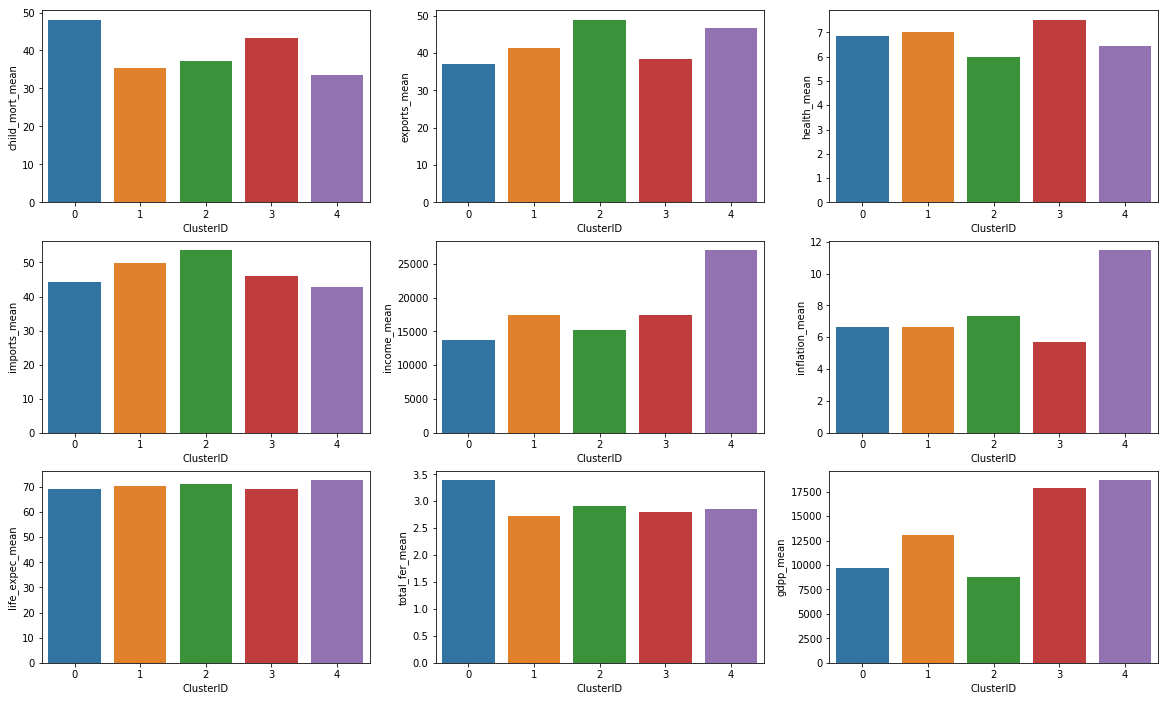

In [53]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=df.exports_mean)
plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=df.health_mean)
plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=df.imports_mean)
plt.subplot(3,3,5)
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.subplot(3,3,6)
sns.barplot(x=df.ClusterID, y=df.inflation_mean)
plt.subplot(3,3,7)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
plt.subplot(3,3,8)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
plt.subplot(3,3,9)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
plt.show()